In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from statsmodels.stats import weightstats

In [5]:
data = pd.read_csv('data/new-site.zip', sep='\t')
data

,site,dwell-time
0,0,2
1,1,48
2,0,15
3,1,16
4,0,38
...,...,...
295,0,22
296,0,7
297,1,144
298,0,89


In [14]:
a_data = data[data['site']==0]
b_data = data[data['site']==1]

In [20]:
a_data.shape

(186, 2)

In [21]:
b_data.shape

(114, 2)

Чему равно суммарное время пребывания на сайте в группах А и В? Ответ вводите без пробелов.



In [7]:
data_gr = data.groupby(by='site').sum()
data_gr

,dwell-time
site,
0,16898
1,10032


Чему равно среднее время пребывание на сайте в группах? Ответ округлите до целых.

In [9]:
data_avg = data.groupby(by='site').mean()
data_avg

,dwell-time
site,
0,90.849462
1,88.000000


In [13]:
alpha = 0.05

_, p = shapiro(data[data['site']==1]['dwell-time'])
print('p=%.3f' % p)

# Интерпретация 

if p > alpha:
	print('H0')
else:
	print('Ha')

p=0.000
Ha


Text(0.5, 1.0, 'Распределение времени на сайте в группе B')

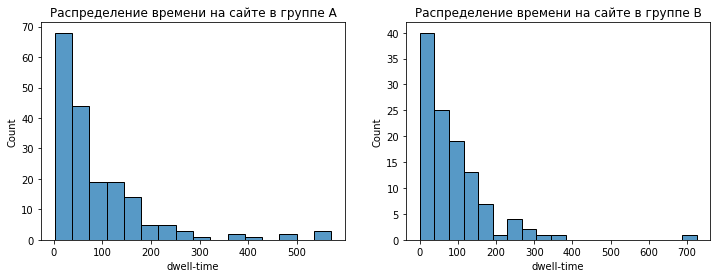

In [18]:
#создаём 2 графика размером 12x4
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#строим гистограмму для времени на сайте в каждой группе
sns.histplot(x='dwell-time', data=a_data, ax=axes[0])
sns.histplot(x='dwell-time', data=b_data, ax=axes[1])
#задаём названия графикам
axes[0].set_title('Распределение времени на сайте в группе А')
axes[1].set_title('Распределение времени на сайте в группе B')

In [25]:
_ ,p = weightstats.ztest(a_data['dwell-time'], x2=b_data['dwell-time'], value=0,alternative='larger')
print(float(p))


if p < 0.05:
    print("Мы отвергаем нулевую гипотезу об отсутсвии различий между данными.")
else:
    print("Мы не можем отвергнуть нулевую гипотезу об отсутсвии различий между данными.")
    
# НЕ ВЕРНО

0.40683227733104266
Мы не можем отвергнуть нулевую гипотезу об отсутсвии различий между данными.
